# Simple Approach to Multi-Label Classification
## by Wilder Rodrigues

https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/learning-stack/Colab-ML-Playbook/blob/master/NLP/Deep%20dive%20into%20multi-label%20classification/Mark_6.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/learning-stack/Colab-ML-Playbook/blob/master/NLP/Deep%20dive%20into%20multi-label%20classification/Mark_6.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## 1. EDA

In [0]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [3]:
!wget https://github.com/ipcplusplus/toxic-comments-classification/raw/master/train.csv

--2019-01-01 23:42:59--  https://github.com/ipcplusplus/toxic-comments-classification/raw/master/train.csv
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ipcplusplus/toxic-comments-classification/master/train.csv [following]
--2019-01-01 23:42:59--  https://raw.githubusercontent.com/ipcplusplus/toxic-comments-classification/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68802655 (66M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  65.62M  47.6MB/s    in 1.4s    

2019-01-01 23:43:01 (47.6 MB/s) - ‘train.csv’ saved [68802655/

In [4]:
data_raw = pd.read_csv('train.csv')
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(159571, 8)

In [5]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 8




**Sample data:**

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### 1.1. Checking for missing values

In [6]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


### 1.2. Calculating number of comments under each label

In [7]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [8]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [9]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


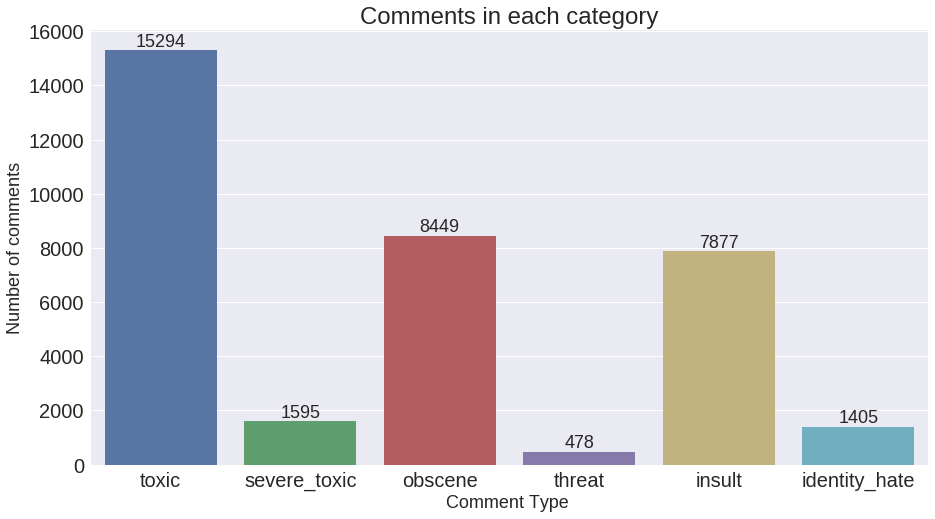

In [10]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

### 1.3. Calculating number of comments having multiple labels

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


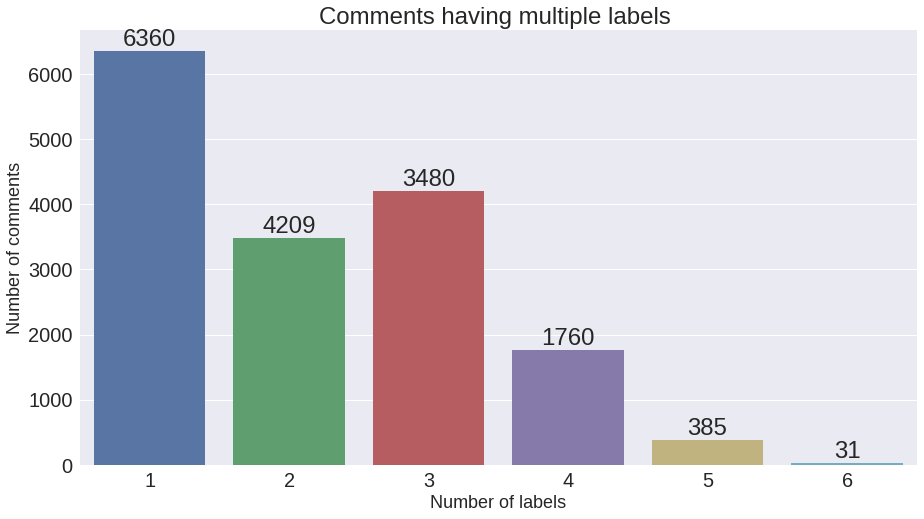

In [11]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 1.4. WordCloud representation of most used words in each category of comments

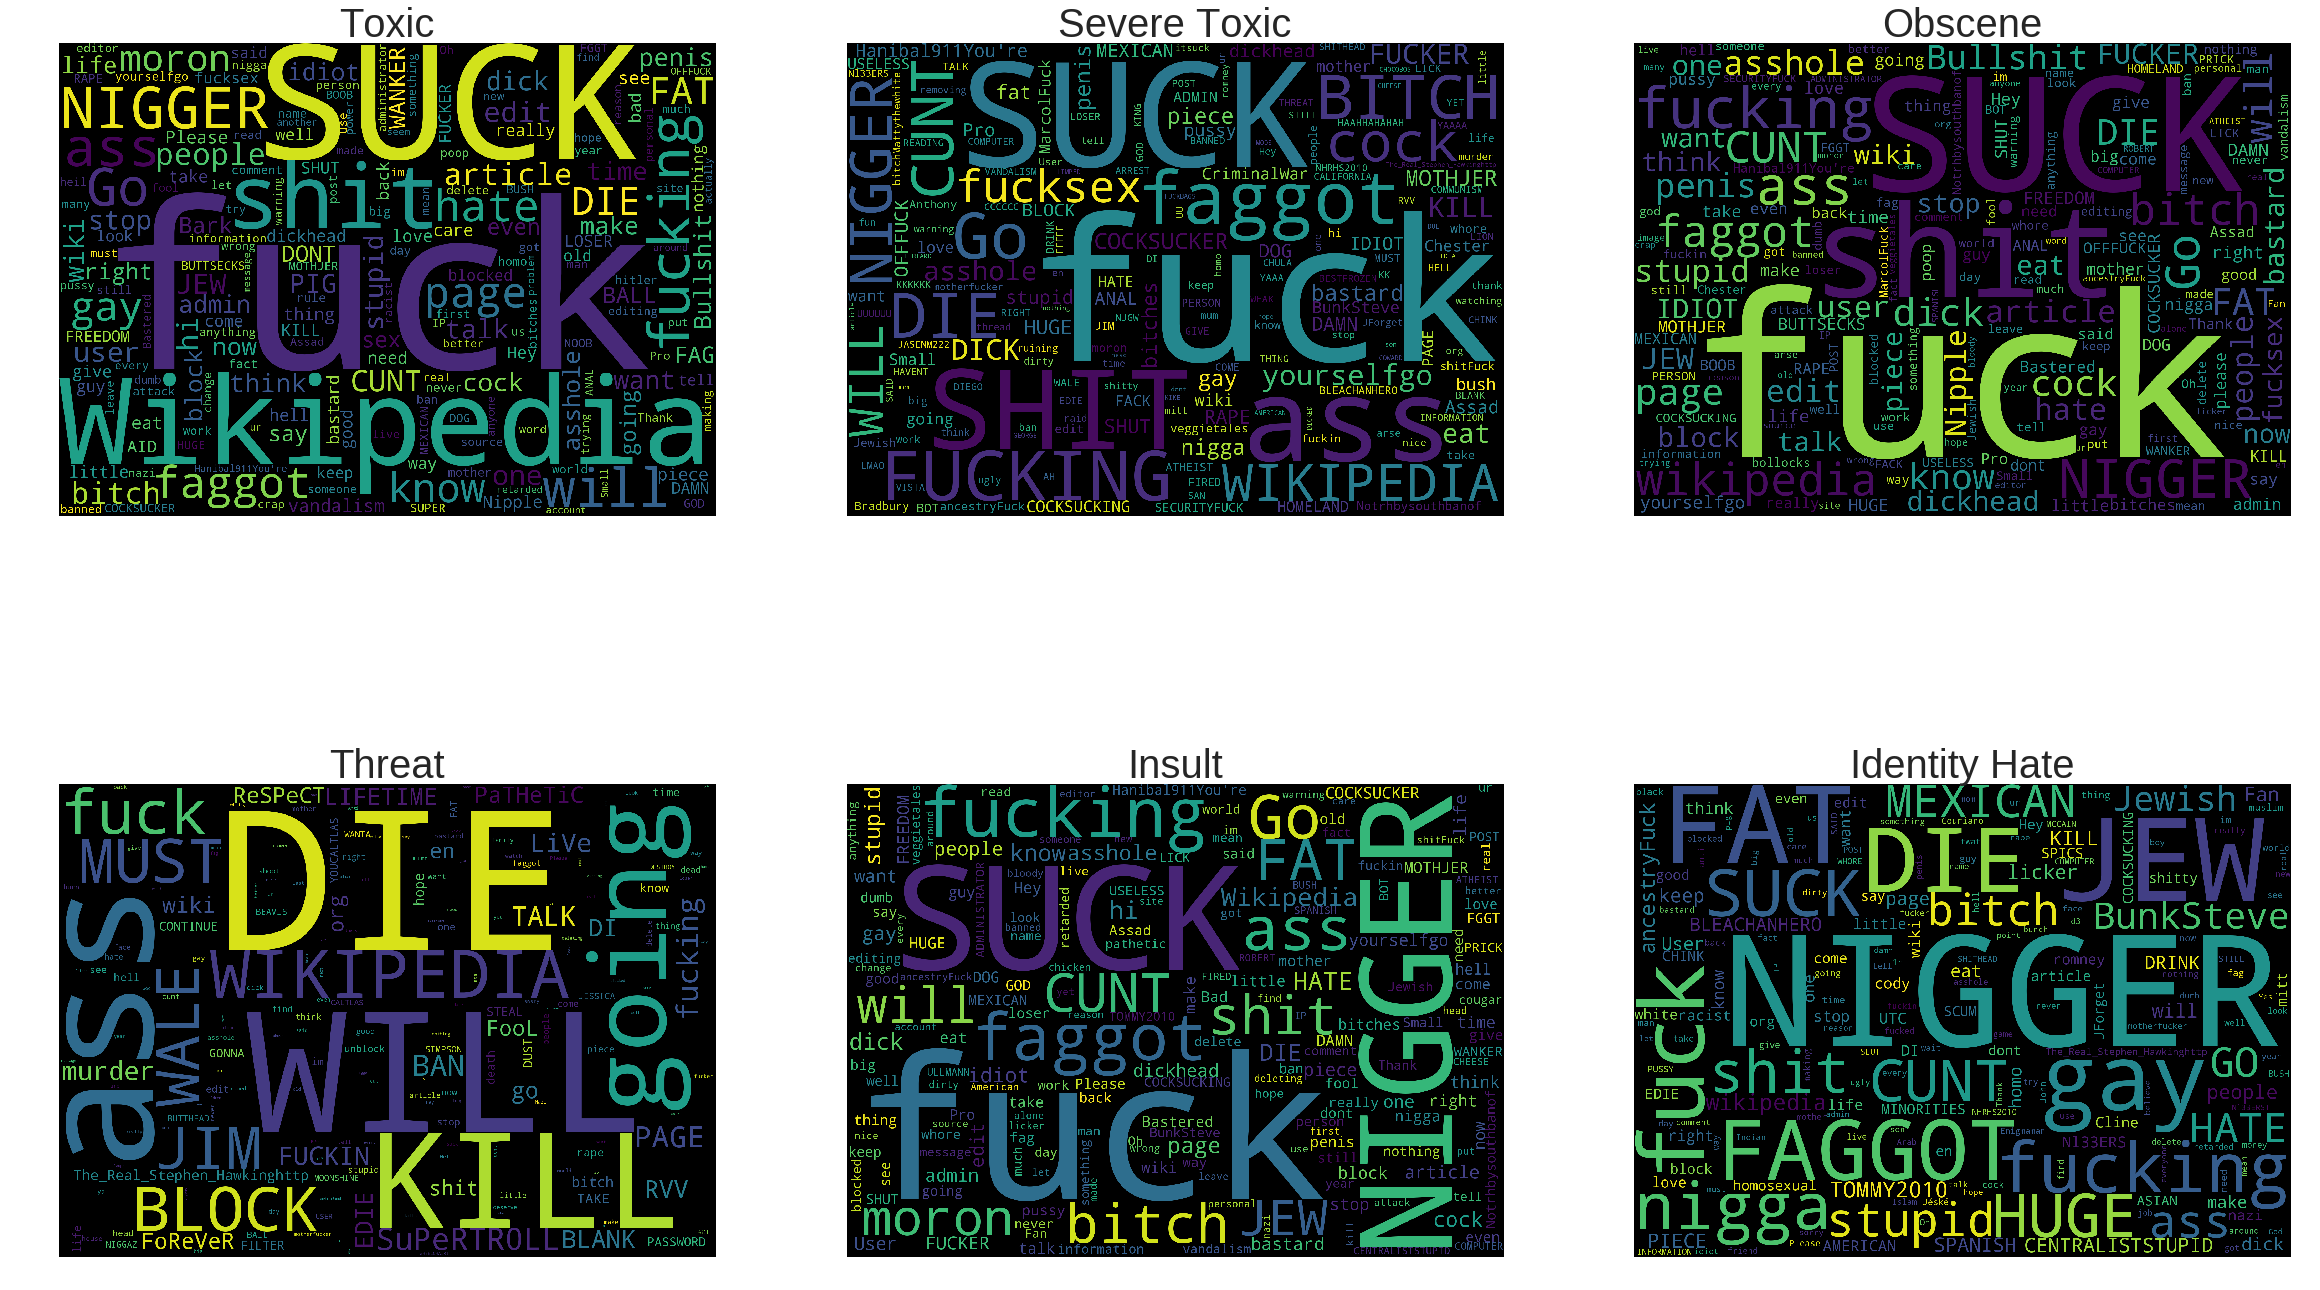

In [15]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)


# obscene
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

## 2. Data Pre-Processing

In [16]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 8)

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 2.1. Cleaning Data

In [0]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [19]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
141563,f54e66861bee44cc,you apparently have a bot doing this so if i m...,0,0,0,0,0,0
133554,ca811abc28960928,theres a good test of big bang big bang predic...,0,0,0,0,0,0
3984,0aa35f34616561b5,dont put words in my mouth im not on the same ...,0,0,0,0,0,0
29040,4cf35b6f5dfbc68b,i really wish we could crap by osmosis right now,1,0,1,0,0,0
139723,ebb51065482c8555,yes and this is evidence why the bbc should no...,0,0,0,0,0,0


### 2.2. Removing Stop Words

In [20]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
141563,f54e66861bee44cc,apparently bot made mistake regret ...,0,0,0,0,0,0
133554,ca811abc28960928,theres good test big bang big bang predicts ...,0,0,0,0,0,0
3984,0aa35f34616561b5,dont put words mouth im premise globa...,0,0,0,0,0,0
29040,4cf35b6f5dfbc68b,really wish could crap osmosis right now,1,0,1,0,0,0
139723,ebb51065482c8555,yes evidence bbc allowed talk children,0,0,0,0,0,0


### 2.3. Stemming

In [21]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
141563,f54e66861bee44cc,appar bot made mistak regret much simpli tax r...,0,0,0,0,0,0
133554,ca811abc28960928,there good test big bang big bang predict univ...,0,0,0,0,0,0
3984,0aa35f34616561b5,dont put word mouth im premis global increas t...,0,0,0,0,0,0
29040,4cf35b6f5dfbc68b,realli wish could crap osmosi right now,1,0,1,0,0,0
139723,ebb51065482c8555,yes evid bbc allow talk children,0,0,0,0,0,0


### 2.4. Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [0]:
train_text = train['comment_text']
test_text = test['comment_text']

### 2.5. TF-IDF

* After splitting the dataset into train & test sets, we want to summarize our comments and convert them into numerical vectors.
* One technique is to pick the most frequently occurring terms (words with high term frequency or tf).  However, the most frequent word is a less useful metric since some words like ‘this’, ‘a’ occur very frequently across all documents.
* Hence, we also want a measure of how unique a word is i.e. how infrequently the word occurs across all documents (inverse document frequency or idf).
* So, the product of tf & idf (TF-IDF) of a word gives a product of how frequent this word is in the document multiplied by how unique the word is w.r.t. the entire corpus of documents.
* Words in the document with a high tfidf score occur frequently in the document and provide the most information about that specific document.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [0]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

## 3. Multi-Label Classification

### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)

* Traditional two-class and multi-class problems can both be cast into multi-label ones by restricting each instance to have only one label. On the other hand, the generality of multi-label problems inevitably makes it more difficult to learn. An intuitive approach to solving multi-label problem is to decompose it into multiple independent binary classification problems (one per category).
* In an “one-to-rest” strategy, one could build multiple independent classifiers and, for an unseen instance, choose the class for which the confidence is maximized.
* The main assumption here is that the labels are mutually exclusive. You do not consider any underlying correlation between the classes in this method.
* For instance, it is more like asking simple questions, say, “is the comment toxic or not”, “is the comment threatening or not?”, etc. Also there might be an extensive case of overfitting here, since most of the comments are unlabeled, i,e., most of the comments are clean comments.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [27]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing toxic comments...**

Test accuracy is 0.895




**Processing severe_toxic comments...**

Test accuracy is 0.9933333333333333




**Processing obscene comments...**

Test accuracy is 0.9416666666666667




**Processing threat comments...**

Test accuracy is 0.9966666666666667




**Processing insult comments...**

Test accuracy is 0.9483333333333334




**Processing identity_hate comments...**

Test accuracy is 0.9933333333333333


CPU times: user 88.3 ms, sys: 48.1 ms, total: 136 ms
Wall time: 2.4 s


### 3.2. Multiple Binary Classifications - (Binary Relevance)

* In this case an ensemble of single-label binary classifiers is trained, one for each class. Each classifier predicts either the membership or the non-membership of one class. The union of all classes that were predicted is taken as the multi-label output. This approach is popular because it is easy to implement, however it also ignores the possible correlations between class labels.
* In other words, if there’s q labels, the binary relevance method create q new data sets from the images, one for each label and train single-label classifiers on each new data set. One classifier may answer yes/no to the question “does it contain trees?”, thus the “binary” in “binary relevance”. This is a simple approach but does not work well when there’s dependencies between the labels.
* OneVsRest & Binary Relevance seem very much alike. If multiple classifiers in OneVsRest answer “yes” then you are back to the binary relevance scenario.

In [28]:
!pip install scikit-multilearn


    100% |████████████████████████████████| 92kB 4.2MB/s 


In [29]:
%%time

import skmultilearn

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8683333333333333


CPU times: user 8.46 s, sys: 1.17 s, total: 9.63 s
Wall time: 9.63 s


### 3.3. Classifier Chains

* A chain of binary classifiers C0, C1, . . . , Cn is constructed, where a classifier Ci uses the predictions of all the classifier Cj , where j < i. This way the method, also called classifier chains (CC), can take into account label correlations.
* The total number of classifiers needed for this approach is equal to the number of classes, but the training of the classifiers is more involved.
* Following is an illustrated example with a classification problem of three categories {C1, C2, C3} chained in that order.
![alt text](https://cdn-images-1.medium.com/max/1000/1*ycwr_uE8_5lnOMNCnFOuXQ.png)

In [0]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [31]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8866666666666667


CPU times: user 7.55 s, sys: 294 ms, total: 7.84 s
Wall time: 7.45 s


### 3.4. Label Powerset

* This approach does take possible correlations between class labels into account. More commonly this approach is called the label-powerset method, because it considers each member of the power set of labels in the training set as a single label.
* This method needs worst case (2^|C|) classifiers, and has a high computational complexity.
* However when the number of classes increases the number of distinct label combinations can grow exponentially. This easily leads to combinatorial explosion and thus computational infeasibility. Furthermore, some label combinations will have very few positive examples.

In [0]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [33]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8866666666666667


CPU times: user 865 ms, sys: 48 ms, total: 913 ms
Wall time: 798 ms


### 3.5. Adapted Algorithm

* Algorithm adaptation methods for multi-label classification concentrate on adapting single-label classification algorithms to the multi-label case usually by changes in cost/decision functions.
* Here we use a multi-label lazy learning approach named ML-KNN which is derived from the traditional K-nearest neighbor (KNN) algorithm.
* The skmultilearn.adapt module implements algorithm adaptation approaches to multi-label classification, including but not limited to ML-KNN.

In [0]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [36]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

Accuracy =  0.8933333333333333


CPU times: user 4min 3s, sys: 25 ms, total: 4min 3s
Wall time: 4min 3s


In [48]:
print(y_test)




        toxic  severe_toxic  obscene  threat  insult  identity_hate
137650      0             0        0       0       0              0
123084      0             0        0       0       0              0
42192       0             0        0       0       0              0
43056       0             0        0       0       0              0
104738      0             0        0       0       0              0
12095       0             0        0       0       0              0
106146      1             0        0       0       0              0
26674       1             0        0       0       0              0
109588      0             0        0       0       0              0
78387       0             0        0       0       0              0
112525      0             0        0       0       0              0
117501      1             0        1       0       0              0
140973      0             0        0       0       0              0
56892       0             0        0       0    

In [46]:
print(predictions_new.toarray())

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


## Conclusion:
**Results:**
* There are two main methods for tackling a multi-label classification problem: problem transformation methods and algorithm adaptation methods.
* Problem transformation methods transform the multi-label problem into a set of binary classification problems, which can then be handled using single-class classifiers.
* Whereas algorithm adaptation methods adapt the algorithms to directly perform multi-label classification. In other words, rather than trying to convert the problem to a simpler problem, they try to address the problem in its full form.
* In an extensive comparison with other approaches, label-powerset method scores best, followed by the one-against-all method.
* Both ML-KNN and label-powerset take considerable amount of time when run on this dataset, so experimentation was done on a random sample of the train data.